# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime as dt
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
#city_url = f"{base_url}q="hobart"&appid={weather_api_key}"
city_url = base_url + "q=" + "hobart" + "&appid=" + weather_api_key
city_weather = requests.get(city_url).json()
print(city_weather)

{'coord': {'lon': 147.3294, 'lat': -42.8794}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 284.02, 'feels_like': 282.73, 'temp_min': 283.29, 'temp_max': 284.29, 'pressure': 1015, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 8.75, 'deg': 230, 'gust': 13.89}, 'clouds': {'all': 20}, 'dt': 1684205631, 'sys': {'type': 2, 'id': 2002195, 'country': 'AU', 'sunrise': 1684185383, 'sunset': 1684220272}, 'timezone': 36000, 'id': 2163355, 'name': 'Hobart', 'cod': 200}


In [7]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_temp = city_weather["main"]["temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | provideniya
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | codrington
Processing Record 7 of Set 1 | van
Processing Record 8 of Set 1 | makakilo city
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | clyde river
Processing Record 13 of Set 1 | verkhnevilyuysk
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | coihaique
Processing Record 18 of Set 1 | pangai
Processing Record 19 of Set 1 | mwinilunga
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | wiwili
Processing Record 23 of Set 

Processing Record 37 of Set 4 | djambala
Processing Record 38 of Set 4 | cape town
Processing Record 39 of Set 4 | padang
Processing Record 40 of Set 4 | cumpas
Processing Record 41 of Set 4 | sosva
Processing Record 42 of Set 4 | tartus
Processing Record 43 of Set 4 | fortuna
Processing Record 44 of Set 4 | inuvik
Processing Record 45 of Set 4 | nikolayevsk-na-amure
Processing Record 46 of Set 4 | geraldton
Processing Record 47 of Set 4 | ixtapa
Processing Record 48 of Set 4 | komsomolskiy
Processing Record 49 of Set 4 | isabela
Processing Record 0 of Set 5 | ahipara
Processing Record 1 of Set 5 | nadym
Processing Record 2 of Set 5 | wajima
Processing Record 3 of Set 5 | kachug
Processing Record 4 of Set 5 | klaksvik
Processing Record 5 of Set 5 | yellowknife
Processing Record 6 of Set 5 | muzquiz
City not found. Skipping...
Processing Record 7 of Set 5 | hambantota
Processing Record 8 of Set 5 | faanui
Processing Record 9 of Set 5 | saint-philippe
Processing Record 10 of Set 5 | hany

Processing Record 24 of Set 8 | chunoyar
Processing Record 25 of Set 8 | sabha
Processing Record 26 of Set 8 | chibombo
Processing Record 27 of Set 8 | kaeo
Processing Record 28 of Set 8 | balkhash
Processing Record 29 of Set 8 | shimanovsk
Processing Record 30 of Set 8 | tinskoy
Processing Record 31 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 32 of Set 8 | letlhakane
Processing Record 33 of Set 8 | bedford
Processing Record 34 of Set 8 | bartica
Processing Record 35 of Set 8 | nanortalik
Processing Record 36 of Set 8 | udachnyy
Processing Record 37 of Set 8 | vostok
Processing Record 38 of Set 8 | bireun
Processing Record 39 of Set 8 | elmadag
Processing Record 40 of Set 8 | ostrovnoy
Processing Record 41 of Set 8 | zhuzhou
Processing Record 42 of Set 8 | port-cartier
Processing Record 43 of Set 8 | zyryanka
Processing Record 44 of Set 8 | san vicente
Processing Record 45 of Set 8 | tabulbah
City not found. Skipping...
Processing Record 46 of Set 8 | walvis bay
P

Processing Record 16 of Set 12 | shizunai
Processing Record 17 of Set 12 | valparaiso
Processing Record 18 of Set 12 | ugoofaaru
Processing Record 19 of Set 12 | nizwa
Processing Record 20 of Set 12 | campbell river
Processing Record 21 of Set 12 | vera cruz
Processing Record 22 of Set 12 | victoria point
Processing Record 23 of Set 12 | gedo
Processing Record 24 of Set 12 | powell river
Processing Record 25 of Set 12 | bharthana
Processing Record 26 of Set 12 | lagos
Processing Record 27 of Set 12 | solsona
Processing Record 28 of Set 12 | borisoglebsk
Processing Record 29 of Set 12 | lexington
Processing Record 30 of Set 12 | nishihara
Processing Record 31 of Set 12 | faya
Processing Record 32 of Set 12 | dhidhdhoo
Processing Record 33 of Set 12 | bairiki
Processing Record 34 of Set 12 | porto santo
Processing Record 35 of Set 12 | naftah
City not found. Skipping...
Processing Record 36 of Set 12 | lubbock
Processing Record 37 of Set 12 | souillac
Processing Record 38 of Set 12 | mus

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Display count
city_data_df.count()


City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,longyearbyen,78.2186,15.6401,-6.09,73,75,4.63,SJ,1684205540
1,avarua,-21.2078,-159.7750,24.03,78,75,2.57,CK,1684205837
2,ushuaia,-54.8000,-68.3000,4.81,87,75,2.57,AR,1684205631
3,provideniya,64.3833,-173.3000,-4.94,58,0,7.15,RU,1684205838
4,mataura,-46.1927,168.8643,14.81,65,13,1.89,NZ,1684205632


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,-6.09,73,75,4.63,SJ,1684205540
1,avarua,-21.2078,-159.7750,24.03,78,75,2.57,CK,1684205837
2,ushuaia,-54.8000,-68.3000,4.81,87,75,2.57,AR,1684205631
3,provideniya,64.3833,-173.3000,-4.94,58,0,7.15,RU,1684205838
4,mataura,-46.1927,168.8643,14.81,65,13,1.89,NZ,1684205632


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

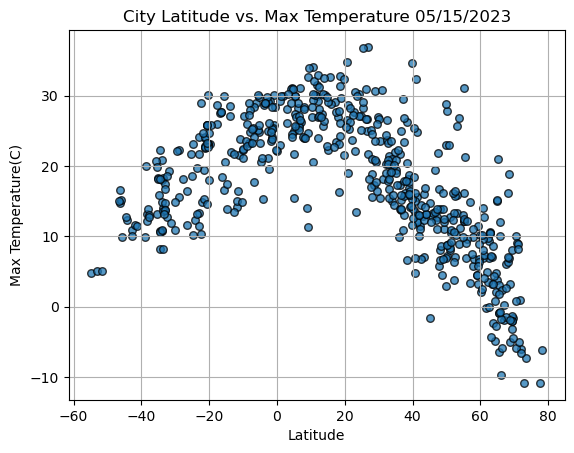

In [24]:
# Build scatter plot for latitude vs. temperature
date = dt.date.today().strftime("%m/%d/%Y")
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o",s=30,alpha=.75, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

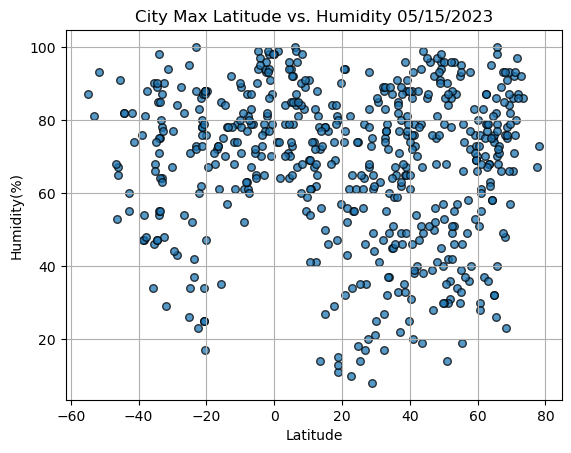

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o",s=30,alpha=.75, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title(f'City Max Latitude vs. Humidity {date}')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

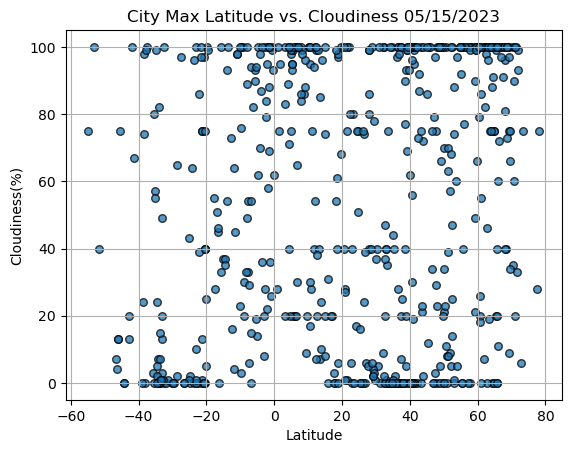

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o",s=30,alpha=.75, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title(f'City Max Latitude vs. Cloudiness {date}')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

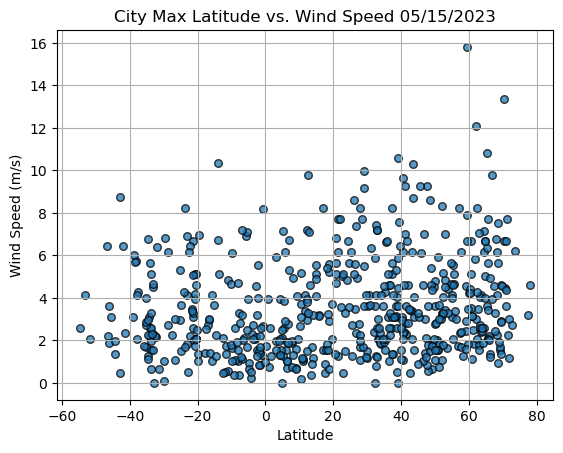

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o",s=30,alpha=.75, edgecolors="k")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'City Max Latitude vs. Wind Speed {date}')
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def linear_reg(x_values, y_values, xlabel, ylabel, coord):
    correlation=st.pearsonr(x_values,y_values)
    #calculate linear regression model  
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    # create equation of line to plot
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, coord, fontsize=15, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,-6.09,73,75,4.63,SJ,1684205540
3,provideniya,64.3833,-173.3000,-4.94,58,0,7.15,RU,1684205838
6,van,38.4924,43.3831,6.64,65,40,3.09,TR,1684205632
7,makakilo city,21.3469,-158.0858,25.20,52,75,7.72,US,1684205632
8,saskylakh,71.9167,114.0833,-6.05,87,93,1.19,RU,1684205839
...,...,...,...,...,...,...,...,...,...
556,cozumel,20.5083,-86.9458,25.53,94,100,1.34,MX,1684205772
558,nizhnevartovsk,60.9344,76.5531,4.01,60,0,3.13,RU,1684205614
559,waddan,29.1614,16.1390,17.67,49,2,5.52,LY,1684205773


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,avarua,-21.2078,-159.7750,24.03,78,75,2.57,CK,1684205837
2,ushuaia,-54.8000,-68.3000,4.81,87,75,2.57,AR,1684205631
4,mataura,-46.1927,168.8643,14.81,65,13,1.89,NZ,1684205632
5,codrington,-38.2667,141.9667,13.21,47,74,5.73,AU,1684205632
10,castro,-24.7911,-50.0119,10.22,71,2,1.52,BR,1684205633


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8338541576984546


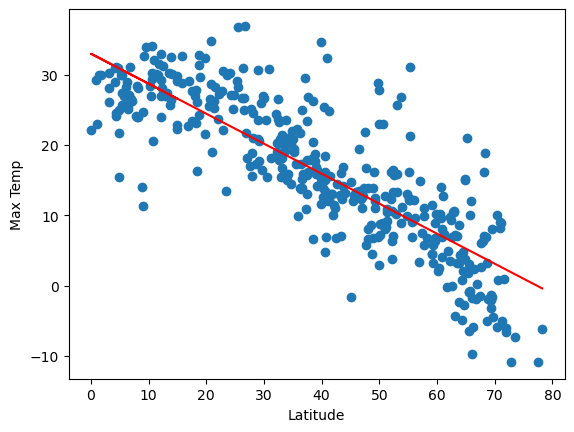

In [31]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], "Latitude", "Max Temp", (5, 260))


The r-value is: 0.7339566849009767


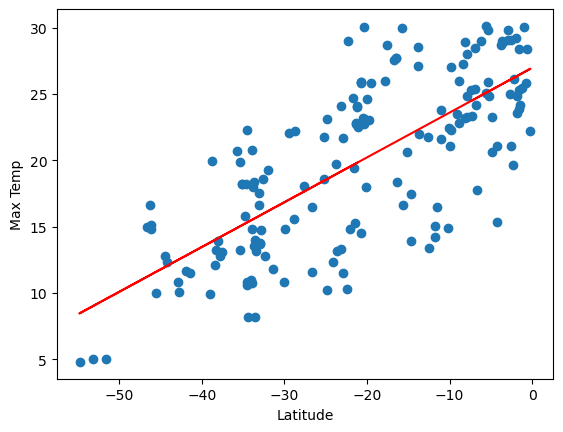

In [32]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], "Latitude", "Max Temp", (-30, 283))


**Discussion about the linear relationship:** 
Northern Hemisphere: An r-value of -0.8338541576984546 indicates a strong negative correlation between the 'Latitude' and 'Max Temp' variables in the Northern Hemisphere dataset. This means that as the latitude increases (moving further north), the maximum temperature tends to decrease. The closer the r-value is to -1, the stronger the negative correlation.

Southern Hemisphere: An r-value of 0.7339566849009767 indicates a positive correlation between the 'Latitude' and 'Max Temp' variables in the Southern Hemisphere dataset. This means that as the latitude increases (moving further south), the maximum temperature tends to increase as well. The closer the r-value is to 1, the stronger the positive correlation.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.0009105076307917077


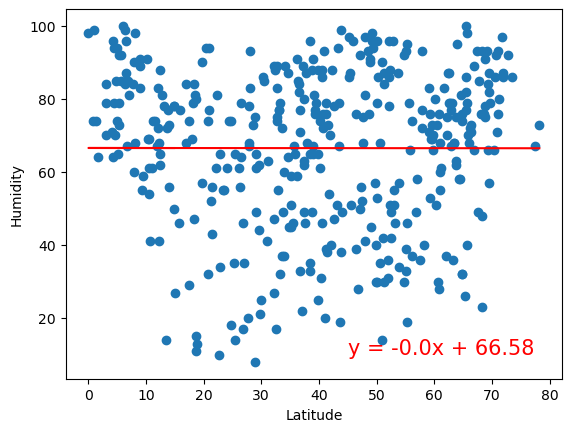

In [33]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Latitude", "Humidity", (45, 10))

The r-value is: 0.23323318869425205


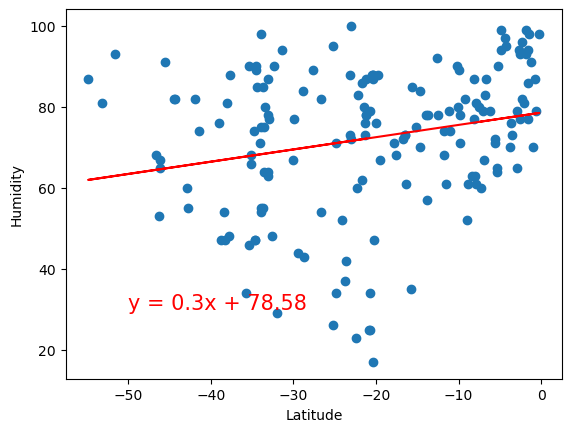

In [34]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], "Latitude", "Humidity", (-50, 30))

**Discussion about the linear relationship:** 
Northern Hemisphere: An r-value of -0.0009105076307917077 indicates a very weak or almost no linear relationship between these variables. The r-value being close to zero suggests that there is no significant linear relationship between latitude and humidity in the Northern Hemisphere based on the given data. It implies that changes in latitude have minimal impact on humidity levels in the Northern Hemisphere.


Southern Hemisphere: An r-value of 0.23323318869425205 indicates a weak positive correlation between the 'Latitude' and 'Humidity' variables in the Southern Hemisphere dataset. This suggests that there is a slight tendency for humidity to increase as latitude increases, but the correlation is not very strong.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07672004569746947


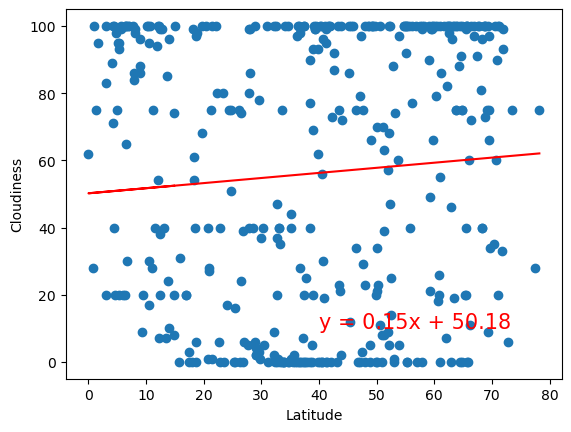

In [35]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], "Latitude", "Cloudiness", (40, 10))

The r-value is: 0.3295403758256422


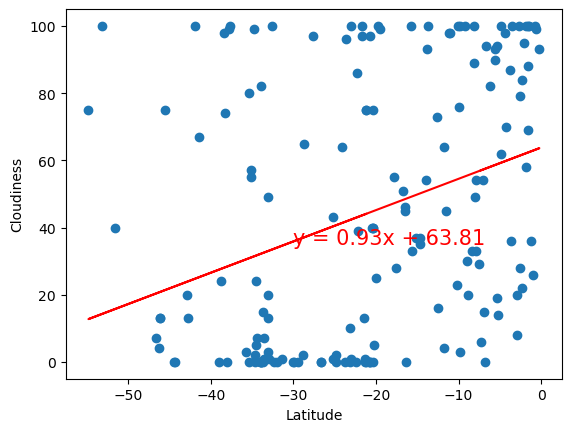

In [36]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Latitude", "Cloudiness", (-30, 35))

**Discussion about the linear relationship:** 
Northern Hemisphere: The r-value 0.07672004569746947 being close to zero suggests that the linear relationship between latitude and cloudiness in the Northern Hemisphere is very weak. It implies that latitude has a minimal impact on cloudiness levels in the Northern Hemisphere based on the given data.

Southern Hemisphere: The r-value 0.3295403758256422 being positive suggests that there is a weak positive linear relationship between latitude and cloudiness in the Southern Hemisphere based on the given data. It implies that there might be a slight tendency for cloudiness to increase as latitude increases in the Southern Hemisphere, although the relationship is not very strong.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.16742232643667618


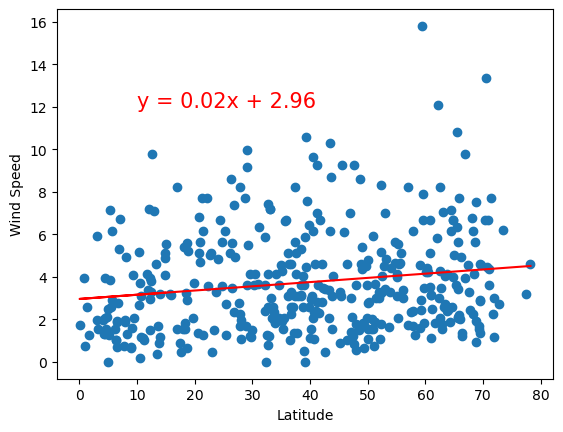

In [37]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], "Latitude", "Wind Speed", (10, 12))

The r-value is: -0.13678236095817486


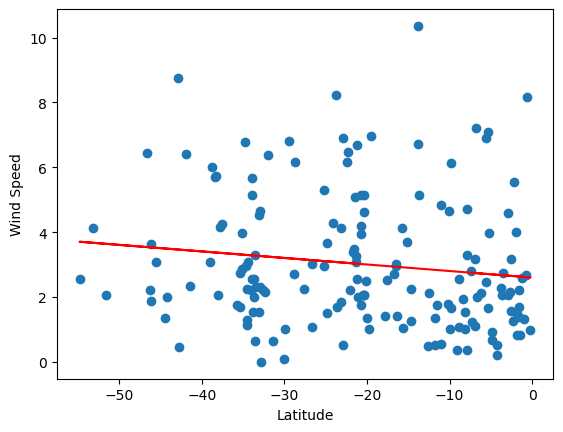

In [38]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], "Latitude", "Wind Speed", (-50, 12))

**Discussion about the linear relationship:** 

Northern Hemisphere: An r-value of 0.16742232643667618 indicates a weak positive correlation between the 'Latitude' and 'Wind Speed' variables in the Northern Hemisphere dataset. This suggests that there is a slight tendency for wind speed to increase as latitude increases, but the correlation is not very strong.

Southern Hemisphere: An r-value of -0.13678236095817486 indicates a weak negative correlation between the 'Latitude' and 'Wind Speed' variables in the Southern Hemisphere dataset. This suggests that there is a slight tendency for wind speed to decrease as latitude increases in the Southern Hemisphere, but the correlation is not very strong. 